In [2]:
import tensorflow as tf
print(tf.__version__)  # Check TensorFlow version
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))  # Check GPU availability

2.17.0
Num GPUs Available:  1


In [3]:

import tensorflow as tf
import os

In [4]:
os.path.join('data', 'happy')

'data/happy'

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data'

In [9]:
os.listdir(data_dir)

['sad', 'happy', '.ipynb_checkpoints']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image data/sad/download (6).jpeg
Issue with image data/sad/mspin_googcolor_medium.jpeg
Issue with image data/sad/pexels-photo-670720.jpeg
Issue with image data/sad/How-to-handle-Grief.jpeg
Issue with image data/sad/sad-person-pictures-1920-x-1110-ycv2h9n0pk9g5x7e.jpeg
Issue with image data/sad/WSCE1K387X.jpeg
Issue with image data/sad/1000_F_452957465_ZDlbGO5mwQ4LisGrusfhuFwYDG2by4lc.jpeg
Issue with image data/sad/14260-2.jpeg
Issue with image data/sad/42e96f1b1da1225ab2ea3c18665bc0ed.jpeg
Issue with image data/sad/sadpersonas-risks-symptoms-suicide.jpeg
Issue with image data/sad/lovepik-a-sad-old-man-png-image_401101920_wh1200.jpeg
Issue with image data/sad/depression.jpeg
Issue with image data/sad/sad-person-black-white-w842iofn67friyxy.jpeg
Issue with image data/sad/sad-person-pictures-1920-x-1080-rymb8ucetkoxlunf.jpeg
Issue with image data/sad/ai-generated-a-person-sitting-on-a-bench-in-rainy-weather-against-a-city-view-generative-ai-free-photo.jpeg
Issue with image data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 128 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

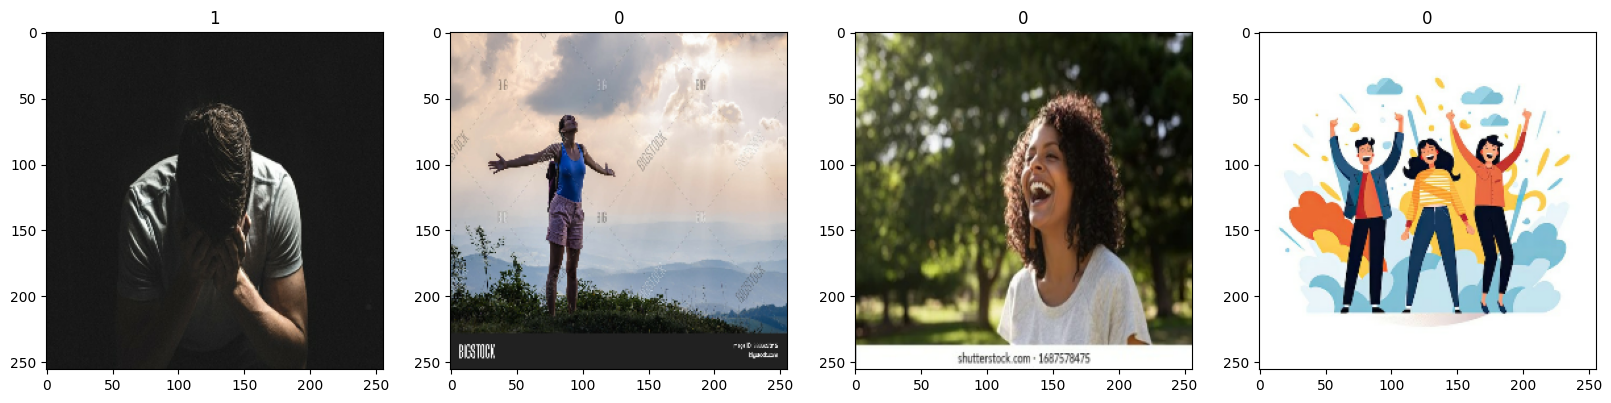

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()[0].max()

1.0

In [19]:
len(data)

4

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
train_size

2

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
len(test)

1

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4062 - loss: 0.9850 - val_accuracy: 0.5625 - val_loss: 0.9227
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - accuracy: 0.6771 - loss: 0.5372 - val_accuracy: 0.7812 - val_loss: 0.6522
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step - accuracy: 0.8438 - loss: 0.6231 - val_accuracy: 0.7812 - val_loss: 0.5875
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.7396 - loss: 0.5897 - val_accuracy: 0.7812 - val_loss: 0.4445
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - accuracy: 0.7604 - loss: 0.4437 - val_accuracy: 0.6250 - val_loss: 0.4867
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step - accuracy: 0.6250 - loss: 0.5407 - val_accuracy: 0.8438 - val_loss: 0.2959
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - accuracy: 0.6979 - loss: 0.5026 - val_accuracy: 0.9062 - val_loss: 0.4992
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step - accuracy: 0.9062 - loss: 0.4633 - val_accuracy: 0.8750 - val_loss: 0

In [39]:
hist.history

{'accuracy': [0.453125,
  0.640625,
  0.828125,
  0.71875,
  0.765625,
  0.609375,
  0.734375,
  0.90625,
  0.828125,
  0.828125,
  0.90625,
  0.921875,
  0.890625,
  0.9375,
  0.9375,
  0.890625,
  0.953125,
  0.953125,
  0.96875,
  0.96875],
 'loss': [1.123852252960205,
  0.5599098801612854,
  0.6268996596336365,
  0.5849188566207886,
  0.42695581912994385,
  0.5542858839035034,
  0.49111273884773254,
  0.4469935894012451,
  0.41476887464523315,
  0.35448646545410156,
  0.2767115831375122,
  0.2634223699569702,
  0.28831398487091064,
  0.18105003237724304,
  0.21078349649906158,
  0.18887564539909363,
  0.1089613288640976,
  0.10814990103244781,
  0.07299187034368515,
  0.11202271282672882],
 'val_accuracy': [0.5625,
  0.78125,
  0.78125,
  0.78125,
  0.625,
  0.84375,
  0.90625,
  0.875,
  0.65625,
  0.8125,
  0.90625,
  0.9375,
  1.0,
  1.0,
  0.90625,
  0.90625,
  0.96875,
  0.96875,
  1.0,
  0.96875],
 'val_loss': [0.9227004051208496,
  0.652169942855835,
  0.5874742269515991,
  

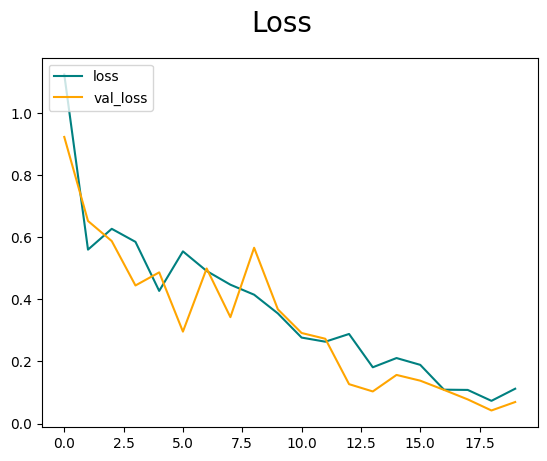

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

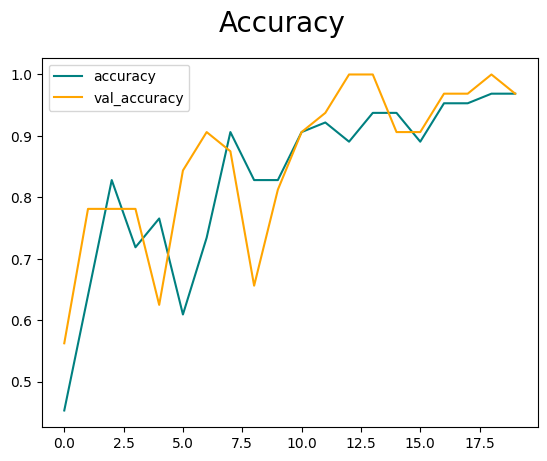

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


In [45]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


In [46]:
import cv2

In [49]:
!ls

data  drive  logs  sample_data


In [51]:
img = cv2.imread('data/happy/happy-people.jpeg')
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


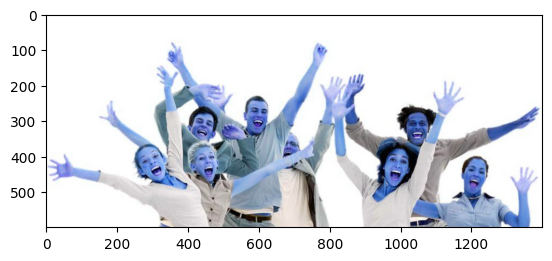

In [52]:
img = cv2.imread('data/happy/happy-people.jpeg')
plt.imshow(img)
plt.show()

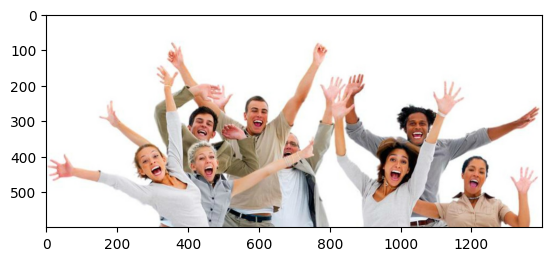

In [53]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

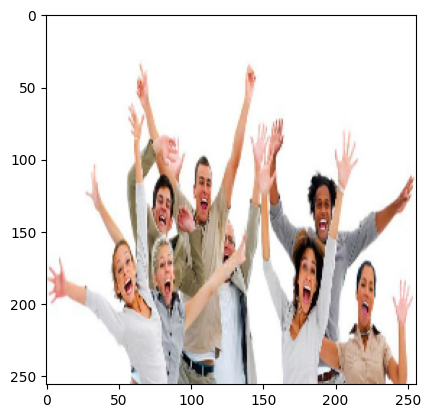

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


In [56]:
yhat

array([[0.0030157]], dtype=float32)

In [57]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join('models','imageclassifier.h5'))

In [61]:
new_model = load_model('models/imageclassifier.h5')

In [62]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


array([[0.0030157]], dtype=float32)